
2. As an intermediate design iteration we will apply polyphase decomposition to the bireciprocal filters. This results in the fliter structure below. Now there are only two different sample rates, as the allpass filter and the first bireciprocal filter runs at the same sample rate. Remember to use the quantized coefficients. 

a) Create the SFG.

In [32]:
from b_asic.core_operations import Addition, ConstantMultiplication
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output
from b_asic.sfg_generators import wdf_allpass

a1 = -0.068129
a3 = -0.242429
a5 = -0.461024
a7 = -0.678715
a9 = -0.888980

a10 = 0.4573
a11 = -0.2098
a12 = 0.5695
a13 = -0.2123
a14 = 0.0952
a15 = -0.2258
a16 = -0.4490

Wf = 11

a1_q = round(a1 * 2**Wf) * 2**(-Wf)
a3_q = round(a3 * 2**Wf) * 2**(-Wf)
a5_q = round(a5 * 2**Wf) * 2**(-Wf)
a7_q = round(a7 * 2**Wf) * 2**(-Wf)
a9_q = round(a9 * 2**Wf) * 2**(-Wf)

a10_q = round(a10 * 2**Wf) * 2**(-Wf)
a11_q = round(a11 * 2**Wf) * 2**(-Wf)
a12_q = round(a12 * 2**Wf) * 2**(-Wf)
a13_q = round(a13 * 2**Wf) * 2**(-Wf)
a14_q = round(a14 * 2**Wf) * 2**(-Wf)
a15_q = round(a15 * 2**Wf) * 2**(-Wf)
a16_q = round(a16 * 2**Wf) * 2**(-Wf)

In [33]:
# H_AP and first H_0 interconnected
h_ap_h_0_in = Input()
h_ap_h_0_out_1 = Output()
h_ap_h_0_out_2 = Output()

# Create all WDFes
wdf_a10 = wdf_allpass([a10_q])
wdf_a11 = wdf_allpass([a11_q, a12_q])
wdf_a13 = wdf_allpass([a13_q, a14_q])
wdf_a15 = wdf_allpass([a15_q, a16_q])

wdf_a3_1 = wdf_allpass([a3_q])
wdf_a7_1 = wdf_allpass([a7_q])
wdf_a1_1 = wdf_allpass([a1_q])
wdf_a5_1 = wdf_allpass([a5_q])
wdf_a9_1 = wdf_allpass([a9_q])

# Connect the WDFs with input/eachother
wdf_a10 <<= h_ap_h_0_in
wdf_a11 <<= wdf_a10
wdf_a13 <<= wdf_a11
wdf_a15 <<= wdf_a13

# 2nd upper
wdf_a3_1 <<= wdf_a15
wdf_a7_1 <<= wdf_a3_1
h_ap_h_0_out_1 <<= wdf_a7_1
h_ap_h_0_out_1.graph_id = "h_ap_h_0_out_1"

# 2nd lower
wdf_a1_1 <<= wdf_a15
wdf_a5_1 <<= wdf_a1_1
wdf_a9_1 <<= wdf_a5_1
h_ap_h_0_out_2 <<= wdf_a9_1
h_ap_h_0_out_2.graph_id = "h_ap_h_0_out_2"


# The output part

# Connect everything for initial SFG
#wdf_a10.connect_external_signals_to_components()
#wdf_a11.connect_external_signals_to_components()
#wdf_a13.connect_external_signals_to_components()
#wdf_a15.connect_external_signals_to_components()
#wdf_a3_1.connect_external_signals_to_components()
#wdf_a7_1.connect_external_signals_to_components()
#wdf_a1_1.connect_external_signals_to_components()
#wdf_a5_1.connect_external_signals_to_components()
#wdf_a9_1.connect_external_signals_to_components()
#wdf_a3_2.connect_external_signals_to_components()
#wdf_a7_2.connect_external_signals_to_components()
#wdf_a1_2.connect_external_signals_to_components()
#wdf_a5_2.connect_external_signals_to_components()
#wdf_a9_2.connect_external_signals_to_components()

H_AP_H_0 = SFG([h_ap_h_0_in], [h_ap_h_0_out_1, h_ap_h_0_out_2])

# Second H_0 standalone
h_0_in = Input()
h_0_out_1 = Output()
h_0_out_2 = Output()

# Create all WDFs
wdf_a3_2 = wdf_allpass([a3_q])
wdf_a7_2 = wdf_allpass([a7_q])
wdf_a1_2 = wdf_allpass([a1_q])
wdf_a5_2 = wdf_allpass([a5_q])
wdf_a9_2 = wdf_allpass([a9_q])

# upper part
wdf_a3_2 <<= h_0_in
wdf_a7_2 <<= wdf_a3_2
h_0_out_1 <<= wdf_a7_2
#h_0_out_1.graph_id = "h_0_out_1"

# lower part
wdf_a1_2 <<= h_0_in
wdf_a5_2 <<= wdf_a1_2
wdf_a9_2 <<= wdf_a5_2
h_0_out_2 <<= wdf_a9_2
#h_0_out_2.graph_id = "h_0_out_2"

H_0 = SFG([h_0_in], [h_0_out_1, h_0_out_2])


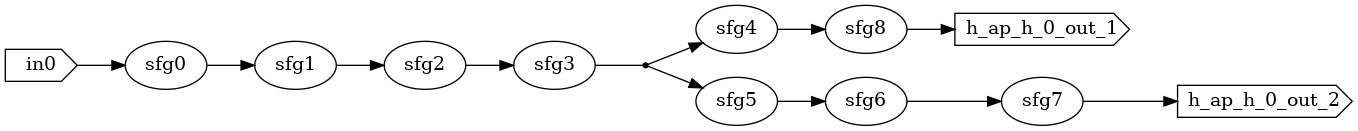

In [34]:
H_AP_H_0

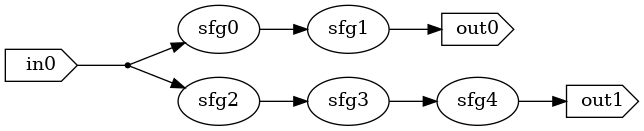

In [35]:
H_0

b) Simulate the impulse response and using your reference signal to validate that the filter has the same function as the frist design iteration...

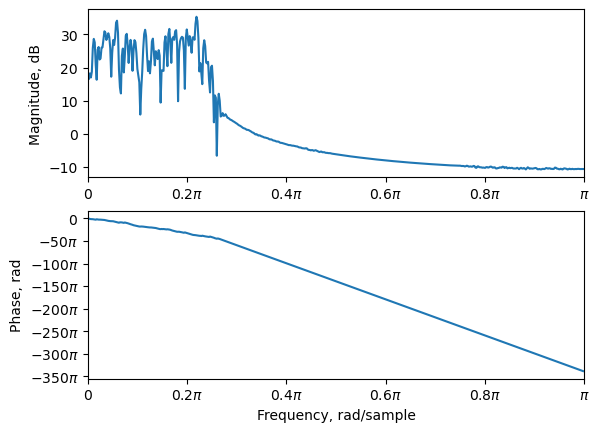

In [40]:
from b_asic.simulation import Simulation
import numpy as np
import matplotlib.pyplot as plt
from b_asic.signal_generator import Impulse
from mplsignal.freq_plots import freqz_fir
from b_asic.utils import upsample
from b_asic.utils import interleave 

import pickle
with open("data.txt", "rb") as f:
    data = pickle.load(f)

# We start by impulsing through H_AP_H_0 (first two filters)
h_ap_h_0_sim = Simulation(H_AP_H_0, [data])
h_ap_h_0_sim.run_for(100)

# We don't have to upsample now
#h_ap_sim_up_q = upsample(h_ap_sim_q.results["0"], 2) 

# Interleave the signal
interleaved = interleave(h_ap_h_0_sim.results["1"], h_ap_h_0_sim.results["0"])

# Put the interleaved signal through H_0
h_0_sim = Simulation(H_0, [interleaved])
h_0_sim.run()

# No need to upsample
#h_0_sim_up_q = upsample(h_0_sim.results["0"], 2)

# Interleave the signal again
y = interleave(h_0_sim.results["1"], h_0_sim.results["0"])

f = freqz_fir(y)

c) Determine the number of adaptor operations required per second. 

In [38]:
fs = 1.6e6
print((7*fs + 5*fs + 5*2*fs)/1e6, "M op/s")

35.2 M op/s
